# 5005 business part 

In [6]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sns

from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

from collections import defaultdict

In [7]:
def read_files():
    d = defaultdict(list)

    parent_dir = '../Data Sets/'

    path_dic = {'B': 'business.csv', 'C':'checkin.csv', 'R':'review.csv'\
               , 'T':'tip.csv', 'U':'user.csv'}
    path_dic = {'R':'review.csv','B': 'B.csv','C':'checkin.csv','T':'tip.csv'}
    for key in path_dic:
        d[key] = pd.read_csv(parent_dir + path_dic[key]).drop('Unnamed: 0', 1)
    return d

In [8]:
d = read_files()

/Users/liyuan/anaconda2/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
d['B'].head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [5]:
d['B'].city.value_counts()[0:10]

Las Vegas     29370
Toronto       18906
Phoenix       18766
Charlotte      9509
Scottsdale     8837
Calgary        7736
Pittsburgh     7017
Montréal       6449
Mesa           6080
Henderson      4892
Name: city, dtype: int64

In [6]:
LV_bussiness=d['B'][d['B']['city']=='Las Vegas']

In [7]:
LV_bussiness.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,NV,89121,36.099872,-115.074574,3.5,3,1,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...","Hair Salons, Hair Stylists, Barbers, Men's Hai...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128528,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",NaN
18,nh_kQ16QAoXWwqZ05MPfBQ,Myron Hensel Photography,NaN,Las Vegas,NV,89121,36.116549,-115.088115,5.0,21,1,{'BusinessAcceptsCreditCards': 'True'},"Event Planning & Services, Photographers, Prof...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
20,dFMxzHygTy6F873843dHAA,Fremont Arcade,"450 Fremont St, Ste 179",Las Vegas,NV,89101,36.169993,-115.140685,4.5,38,1,{'GoodForKids': 'True'},"Arcades, Arts & Entertainment","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
22,KWywu2tTEPWmR9JnBc0WyQ,Hunk Mansion,6007 Dean Martin Dr,Las Vegas,NV,89118,36.080168,-115.182756,4.0,107,1,"{'BikeParking': 'False', 'Ambience': ""{'romant...","Nightlife, Arts & Entertainment, Bars, Strip C...","{'Thursday': '19:30-2:0', 'Friday': '19:30-3:0..."


In [10]:
LV_bussiness['attributes'][0:1]

7    {'RestaurantsPriceRange2': '3', 'GoodForKids':...
Name: attributes, dtype: object

In [11]:
print ([x +'===========================' for x in LV_bussiness['attributes'][0:3]])

["{'RestaurantsPriceRange2': '3', 'GoodForKids': 'True', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'False', 'BikeParking': 'False'}===========================", '{\'OutdoorSeating\': \'False\', \'BusinessAcceptsCreditCards\': \'True\', \'RestaurantsDelivery\': \'False\', \'RestaurantsReservations\': \'True\', \'RestaurantsAttire\': "\'casual\'", \'Ambience\': "{\'romantic\': True, \'intimate\': False, \'touristy\': False, \'hipster\': False, \'divey\': False, \'classy\': True, \'trendy\': False, \'upscale\': False, \'casual\': False}", \'HasTV\': \'False\', \'BYOBCorkage\': "\'no\'", \'NoiseLevel\': "u\'quiet\'", \'RestaurantsTakeOut\': \'True\', \'RestaurantsPriceRange2\': \'2\', \'RestaurantsGoodForGroups\': \'True\', \'WiFi\': "u\'no\'", \'Caters\': \'True\', \'GoodForKids\': \'True\', \'Alcohol\': "u\'full_bar\'", \'BusinessParking\': "{\'garage\': False, \'street\': False, \'validated\': False, \'lot\': True, \'valet\': False}"}===========================', "{'Bus

In [12]:
combine = pd.read_csv('../Data Sets/business.csv' ).drop('Unnamed: 0', 1)

In [13]:
combine.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,price,credit_card
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",',NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",',False
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,NaN,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",NaN,NaN
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",NaN,False


In [14]:
with open('../Data Sets/business.json') as f:
    json = pd.DataFrame(json.loads(line) for line in f)

In [15]:
json.city.value_counts()

Las Vegas     29370
Toronto       18906
Phoenix       18766
Charlotte      9509
Scottsdale     8837
              ...  
Sunrise           1
Clinton           1
Nationwide        1
Scottadale        1
                  1
Name: city, Length: 1204, dtype: int64

In [16]:
d['R'].groupby('business_id').count()

,funny,user_id,stars,review_id,cool,date,useful,text
business_id,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,1661,1661,1661,1661,1661,1661,1661,1661
--cZ6Hhc9F7VkKXxHMVZSQ,358,358,358,358,358,358,358,358
-050d_XIor1NpCuWkbIVaQ,725,725,725,725,725,725,725,725
-0qht1roIqleKiQkBLDkbw,411,411,411,411,411,411,411,411
-0tgMGl7D9B10YjSN2ujLA,136,136,136,136,136,136,136,136
...,...,...,...,...,...,...,...,...
zvQIEpJUmLLmMMffNntHXQ,140,140,140,140,140,140,140,140
zw9_mqWBn1QCfZg88w0Exg,165,165,165,165,165,165,165,165
zwNC-Ow4eIMan2__bS9-rg,601,601,601,601,601,601,601,601


In [17]:
d['R'].head(5)

,funny,user_id,stars,review_id,cool,business_id,date,useful,text
0,1.0,hG7b0MtEbXx5QzbzE6C_VA,1.0,Q1sbwvVQXV2734tPgoKj4Q,0.0,ujmEBvifdJM6h6RLv4wQIg,2013-05-07 04:34:36,6.0,Total bill for this horrible service? Over $8G...
1,0.0,RBXSJA372ilErzNwz0jXvQ,4.0,8Edv5pKe5lOBoN5UZTUI1w,0.0,ujmEBvifdJM6h6RLv4wQIg,2017-02-09 06:45:18,0.0,My family has used this ER four times in the p...
2,0.0,x3brMMbJrAW9PwW5A6YL5w,1.0,kEs5u0cGPtiSQCLW7b0l9g,0.0,ujmEBvifdJM6h6RLv4wQIg,2018-08-14 05:25:33,1.0,I have never been more disappointed by the car...
3,0.0,Skzdl0sWhW88525a1vr59g,1.0,Pm6qydbW58BB0zdWCPlBmg,0.0,ujmEBvifdJM6h6RLv4wQIg,2018-05-08 19:27:59,3.0,"Went in for a broken finger, was asked if I wa..."
4,0.0,3Y25VDfnQVcuc33T-U3Z6A,5.0,QWJVYwNxUY_Plu4Ipz33_A,0.0,ujmEBvifdJM6h6RLv4wQIg,2014-10-11 06:57:18,1.0,My mother was at Mountain View for nearly two ...


In [18]:
d['C'].count()

business_id    161950
date           161950
dtype: int64

In [19]:
d['T'].head()

,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


In [20]:
Tip_counts=d['T'].groupby("business_id").count()['compliment_count']

In [21]:
Tip_counts.head()

business_id
--1UhMGODdWsrMastO9DZw      1
--6MefnULPED_I942VcFNA     14
--7zmmkVg-IMGaXbuVd0SQ     11
--9QQLMTbFzLJ_oT-ON3Xw      2
--9e1ONYQuAa-CB_Rrw7Tw    160
Name: compliment_count, dtype: int64

In [22]:
Tip_counts.info()

AttributeError: 'Series' object has no attribute 'info'

In [23]:
LV_bussiness_T=LV_bussiness.merge(Tip_counts,left_on='business_id', right_index=True,how='left')

In [24]:
LV_bussiness_T.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,compliment_count
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,NV,89121,36.099872,-115.074574,3.5,3,1,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...","Hair Salons, Hair Stylists, Barbers, Men's Hai...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",NaN
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128528,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",NaN,3.0
18,nh_kQ16QAoXWwqZ05MPfBQ,Myron Hensel Photography,NaN,Las Vegas,NV,89121,36.116549,-115.088115,5.0,21,1,{'BusinessAcceptsCreditCards': 'True'},"Event Planning & Services, Photographers, Prof...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",NaN
20,dFMxzHygTy6F873843dHAA,Fremont Arcade,"450 Fremont St, Ste 179",Las Vegas,NV,89101,36.169993,-115.140685,4.5,38,1,{'GoodForKids': 'True'},"Arcades, Arts & Entertainment","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",6.0
22,KWywu2tTEPWmR9JnBc0WyQ,Hunk Mansion,6007 Dean Martin Dr,Las Vegas,NV,89118,36.080168,-115.182756,4.0,107,1,"{'BikeParking': 'False', 'Ambience': ""{'romant...","Nightlife, Arts & Entertainment, Bars, Strip C...","{'Thursday': '19:30-2:0', 'Friday': '19:30-3:0...",8.0


In [25]:
d['C']['C_data_count']=[ len(i.split(',')) for i in d['C']['date']]

In [26]:
LV_bussiness_T_C=LV_bussiness_T.merge(d['C'],on='business_id',how='left')

In [27]:
LV_bussiness_T_C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29370 entries, 0 to 29369
Data columns (total 17 columns):
business_id         29370 non-null object
name                29370 non-null object
address             27550 non-null object
city                29370 non-null object
state               29370 non-null object
postal_code         29282 non-null object
latitude            29370 non-null float64
longitude           29370 non-null float64
stars               29370 non-null float64
review_count        29370 non-null int64
is_open             29370 non-null int64
attributes          25043 non-null object
categories          29294 non-null object
hours               22774 non-null object
compliment_count    21610 non-null float64
date                25363 non-null object
C_data_count        25363 non-null float64
dtypes: float64(5), int64(2), object(10)
memory usage: 4.0+ MB


In [28]:
usdLV_bussiness_T_C=LV_bussiness_T_C[['business_id','latitude','longitude','stars','review_count','compliment_count','C_data_count']]
usdLV_bussiness_T_C.to_csv('LV_bussiness_T_C.csv', index=True)

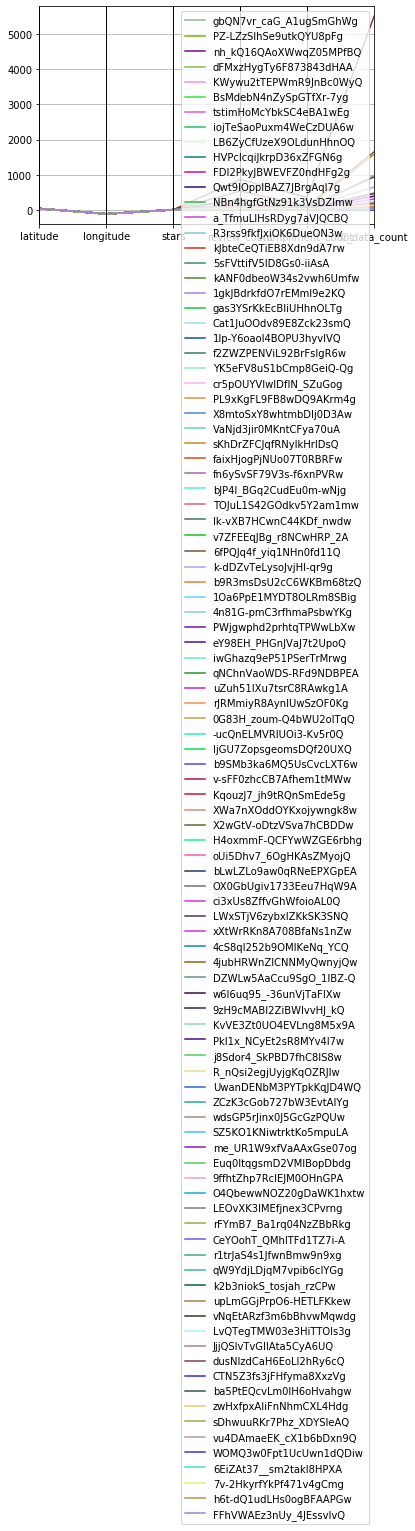

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(usdLV_bussiness_T_C.head(100),'business_id')
plt.show()

In [11]:
import plotly.express as px
test=pd.read_csv("final1000.csv")[['business_id','stars_y', 'categories_count',#'checkin_count',
        'location', 'open', 'environment', 'value', 'taste',
       'food', 'survice', 'feeling']]


fig = px.parallel_coordinates(test[0:100], color='stars_y',
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()
#fig.write_html('second.html', auto_open=True)

In [12]:
test=pd.read_csv("final1000.csv")[['business_id','stars_y', 'categories_count',#'checkin_count',
        'location', 'open', 'environment', 'value', 'taste',
       'food', 'survice', 'feeling']]
#test.to_csv('real1000.csv')

In [15]:
test[25:].head(100)

,business_id,stars_y,categories_count,location,open,environment,value,taste,food,survice,feeling
25,15KIfPDU5IQ07l79Wn1Eew,4.0,2,4.25,1.00,3.93,4.00,4.00,5.00,4.50,4.50
26,1Df5WnLX3DqN6ymlhqznaQ,4.5,6,3.89,3.97,3.93,4.01,4.19,3.83,3.81,3.80
27,1Oa6PpE1MYDT8OLRm8SBig,4.5,3,4.83,4.00,4.40,5.00,2.00,5.00,5.00,5.00
28,1YxLacCdn4yYQDPUzdye8g,4.0,4,4.83,4.88,4.40,5.00,2.00,5.00,5.00,5.00
29,1bfG-RJrbTmPBPHXdTx8ww,3.5,3,5.00,5.00,4.40,5.00,2.00,5.00,4.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...
120,7QXbCdmyDFHFK_cbG4TPVQ,2.0,3,3.14,3.50,3.75,3.00,4.33,2.00,3.00,4.00
121,7Qt8-mOdqkAri_9t74h_EA,3.0,9,2.50,2.50,3.75,1.00,3.33,4.00,3.00,2.43
122,7W8S1-A8sB3ngsoHyNflGA,5.0,2,3.75,4.50,3.75,5.00,3.33,3.83,5.00,5.00
123,7Wr0piSMGiq5qy5opiLNrA,3.5,4,3.75,4.50,3.75,4.80,3.33,3.83,3.45,3.25


In [33]:
usdLV_bussiness_T_C.head(100).to_csv('plotlydata100.csv',header=True)

In [31]:
import plotly.graph_objects as go

mapbox_access_token = open(".mapbox_token").read()

fig = go.Figure(go.Scattermapbox(
        lat=['38.91427','38.91538','38.91458',
             '38.92239','38.93222','38.90842',
             '38.91931','38.93260','38.91368',
             '38.88516','38.921894','38.93206',
             '38.91275'],
        lon=['-77.02827','-77.02013','-77.03155',
             '-77.04227','-77.02854','-77.02419',
             '-77.02518','-77.03304','-77.04509',
             '-76.99656','-77.042438','-77.02821',
             '-77.01239'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=["The coffee bar","Bistro Bohem","Black Cat",
             "Snap","Columbia Heights Coffee","Azi's Cafe",
             "Blind Dog Cafe","Le Caprice","Filter",
             "Peregrine","Tryst","The Coupe",
             "Big Bear Cafe"],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=38.92,
            lon=-77.07
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '.mapbox_token'

In [52]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(usdLV_bussiness_T_C.head(1000), lat="latitude", lon="longitude", hover_name="business_id", hover_data=["stars", "review_count"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [3]:
us_cities.head()

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814


In [47]:
usdLV_bussiness_T_C.head()

,business_id,latitude,longitude,stars,review_count,compliment_count,C_data_count
0,gbQN7vr_caG_A1ugSmGhWg,36.099872,-115.074574,3.5,3,NaN,11.0
1,PZ-LZzSlhSe9utkQYU8pFg,36.100016,-115.128528,4.0,40,3.0,17.0
2,nh_kQ16QAoXWwqZ05MPfBQ,36.116549,-115.088115,5.0,21,NaN,1.0
3,dFMxzHygTy6F873843dHAA,36.169993,-115.140685,4.5,38,6.0,66.0
4,KWywu2tTEPWmR9JnBc0WyQ,36.080168,-115.182756,4.0,107,8.0,142.0


In [34]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['colorVal'],
                   colorscale = 'Electric',
                   showscale = True,
                   cmin = -4000,
                   cmax = -100),
        dimensions = list([
            dict(range = [32000,227900],
                 constraintrange = [100000,150000],
                 label = "Block Height", values = df['blockHeight']),
            dict(range = [0,700000],
                 label = 'Block Width', values = df['blockWidth']),
            dict(tickvals = [0,0.5,1,2,3],
                 ticktext = ['A','AB','B','Y','Z'],
                 label = 'Cyclinder Material', values = df['cycMaterial']),
            dict(range = [-1,4],
                 tickvals = [0,1,2,3],
                 label = 'Block Material', values = df['blockMaterial']),
            dict(range = [134,3154],
                 visible = True,
                 label = 'Total Weight', values = df['totalWeight']),
            dict(range = [9,19984],
                 label = 'Assembly Penalty Wt', values = df['assemblyPW']),
            dict(range = [49000,568000],
                 label = 'Height st Width', values = df['HstW'])])
    )
)
fig.show()

In [21]:
from textblob import TextBlob
text1='good'
text2='bad'
print(TextBlob(text1).sentiment.polarity)
print(TextBlob(text2).sentiment.polarity)

0.7
-0.6999999999999998


In [17]:
!pip install textblob

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 645kB 42kB/s eta 0:00:011
